In [72]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from Bio.Seq import Seq
import re,glob,os
from scipy.stats import spearmanr
import subprocess
import seaborn as sns
import random
import tempfile
import datetime
import string


In [2]:
def hamming_distance(string1, string2):
    return sum(c1 != c2 for c1, c2 in zip(string1, string2))

def hamming_distance1(array1):
    return sum(c1 != c2 for c1, c2 in zip(array1[0], array1[1]))

In [3]:
DATADIR = '/Users/xuanyuanqiao/Desktop/analysis'
os.chdir(DATADIR)

STCfiles = glob.glob(DATADIR+'/STC/*.d3.stc')

this_expt_uniq_id = f'__d8__{datetime.datetime.today().strftime("%A")}__{"".join(random.choice(string.ascii_lowercase) for i in range(5))}__'


In [4]:
fn = STCfiles.pop(0)
fn_meta = re.sub(r'.stc','',os.path.basename(fn))
df = pd.read_csv(fn,sep='\t',names=['Seq',fn_meta],header=None,index_col='Seq')


In [5]:
for fn in STCfiles:
    fn_meta = re.sub(r'.stc','',os.path.basename(fn))
    print(f"{fn_meta}\t{len(df):,}")
    #fn_meta = re.split(r'[_.]',os.path.basename(fn))[:-1]
    df = df.merge( pd.read_csv(fn,sep='\t',names=['Seq',fn_meta],header=None,index_col='Seq'),how='outer',left_index=True, right_index=True)
df.fillna(0,inplace=True)
print(f"{len(df)} seqs after loading.")

Ara_rep1_t1.d3	82,156
t0.d3	169,131
Ara_rep1_t3.d3	251,085
Ara_rep2_t2.d3	338,777
Glu_t3.d3	430,604
Glu_t1.d3	518,674
Ara_rep1_t2.d3	600,931
Ara_rep2_t1.d3	688,456
Ara_rep2_t3.d3	771,487
866490 seqs after loading.


In [7]:
df

,Glu_t2.d3,Ara_rep1_t1.d3,t0.d3,Ara_rep1_t3.d3,Ara_rep2_t2.d3,Glu_t3.d3,Glu_t1.d3,Ara_rep1_t2.d3,Ara_rep2_t1.d3,Ara_rep2_t3.d3
Seq,,,,,,,,,,
AAAAATTCGAGCTCGGTACTAAATTGGTTATAACATAGATGTGTATAAGAGACAGCAGCACAATAGCGCAACAATCAGTGAGCGATATATTTTGCTGATGACCGGCATTTGTTCGTCTAAAAACGGTGAATACCGGATCGCTAAAAACAGCCCTAAGGCCTGTCTCTTATACACATCTAATTAATTAATCGACCTGCAGGCATTCAAGCTTG,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACTAGCGAATTCGAGCTCGGAACTAAAGTGGTTATAAAATAGATGTGTATAAGAGACAGGGACAAGGCAACGGGGCTGTTTCCGTCATTCACAATGCAGAGATCGACCAAATCGTCTATTATTCTGATGAAACGGATGATTGCCCGGATTTTAGCTGTCTCTTATACACATCTAATTAATTAATCGACCTGCAGGC,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
AAACTAGCGAATTCGAGCTCGGTACAAAAGTGGTTATAAAATAGATGTGTATAAGAGACAGCATCCTGCCAATTCACCGTGACATTTTTTGCACCTTTTTCATATGCATGCTTCACAATTAAGCGGACAAAATCCTGTACATCTGTTGAAGCATTTACCTGTCTATTATACACATCTAATTAATTAATCGACCTGCAGGC,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
AAACTAGCGAATTCGAGCTCGGTACAAAAGTGGTTATAACATAGATGTGAATAAGAGACAGGTCTTGGCGGCATCCGGACGCGCCTGCGGATGCAAGCATGAATTTGGATTATTTTAAAGAGCTTGCGAGAACAGCGGAGCGGGGCAAGCTGGATATGCTGTTTTTCTGTCTCTTATACACATCTAATTAATTAATCGACCTGCAGGCATGCAAGCTTGGCTGTT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
AAACTAGCGAATTCGAGCTCGGTACTAAAGTGGATAAAACATAGATGTGTATAAGAGACAGGAGTAAGGGAGAAAAAATGTAAGCGGATTCATTTGAGGGGGAATGGACGTGTTAGCAATTTTAGGCTTTCTCATGATGCTCGTGTTTATGGCCTGTCTCTTATACACATCTAATTAATTAATCGACCTGCAGGC,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
TTTCTAGCGAATTCGAGCTCGGTACTAAAGTGGTTATAACATATATGTGTATAAGAGACAGGCTGGAAGAAGTCATGAAAAACGGCAAAGCGCTTGAAAAATTCAAGGACTTCCTCAAAAACCAAGGCGGCGACAGCTCGATTGTTGACGATCCATCTAAGCTTCCGCAAGCTGCATATCAAATTGATGCTGTCTCTTATACACATCTAATTAATTAATCGACCTGCAGGC,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
TTTCTAGCGAATTCGAGCTCGGTACTAAAGTGGTTATAACATATATGTGTATAAGAGACAGGTTTAAAGAGATTCAAAGAAAAACGAATGTGTCTGTCATTCTGATTACACACGATTTAGGGGCTGTCTCTTATACACATCTAATTAATTAATCGACCTGCAGGCATGCAAGCTTG,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
TTTCTAGCGAATTCGAGCTCGGTACTAAAGTGTTTATAACATAGATGTGTATAAGAGACAGCTTGGCCGGTCTAATGGCATCGGAGCTTGGAGAAGAAGCAAAGCTTGCTAAACGTGCGGGCCTTCTTCACGACTGTCTCTTATACACATCTAATTAATTAATCGACCTGCAGGCATGCAAGCTTG,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [8]:
df['TotalReads'] = np.sum(df,axis=1)

# convert NReads to integers
for cn in df.columns.values:
    df[cn] = df[cn].astype(int)

In [9]:
import os
os.getcwd()

'/Users/xuanyuanqiao/Desktop/analysis'

In [8]:
stc = pd.read_csv("output_d4",sep='\t',header=None,names=['Seq','NReads','component_seqs'],index_col='Seq')

In [9]:
stc

,NReads,component_seqs
Seq,,
TAACATAGATGTGTATAAGAGACAGATATGGAAGAAGGGTTAGGTTTTTCTTGTTTTCTTTGTCTTTCAGTGTTCAAACTGCCAAAACGTGTTTTTCTCAGTATGTTCAGGGGTACACATACGCTGTCTCTTATACACATCTAATTAATT,59163,TAACATAGATGTGTATAAGAGACAGATATGGAAGAAGGGTTAGGTT...
TAACATAGATGTGTATAAGAGACAGGTCTCACTCGGAACAGCGGATAAGCATCCGTGGCTGATTGAGATGTACGAACGAAAAGGCTATGTCCGCGCAGGTGAACAAGACCTTGGCAAAGGGCATATGCTGTCTCTTATACACATCTAATTAATT,56182,TAACATAGATGTGTATAAGAGACAGGTCTCACTCGGAACAGCGGAT...
TAACATAGATGTGTATAAGAGACAGGCTTCAGGTCATCAAGTCCATTGCGGAAAAACAAACAACGATGATCATTGTTACGCACGAAATGGCATTTGCAAAAGAGGTCGCTGATAAAGCTGTCTCTTATACACATCTAATTAATT,55787,TAACATAGATGTGTATAAGAGACAGGCTTCAGGTCATCAAGTCCAT...
TAACATAGATGTGTATAAGAGACAGATGTTGATCCGTGGGCTGCATTCTTCAACCCAAGCTTTTTTATCACCGCAGGCCATGTCGTTTTATCCTGTCTCTTATACACATCTAATTAATT,52392,TAACATAGATGTGTATAAGAGACAGATGTTGATCCGTGGGCTGCAT...
TAACATAGATGTGTATAAGAGACAGGGATGATTCAGGATGCAAGAGACCGCGGAATGCTAATTGACGCTACATACGGACGAAGAACCCGTGCAGTTGTCGTCATGGATAGCTGTCTCTTATACACATCTAATTAATT,51823,TAACATAGATGTGTATAAGAGACAGGGATGATTCAGGATGCAAGAG...
...,...,...
TTACATAGATGTGTATAAGAGACAGACATGACGGTCTTTGAGGAACAAAGTGGTGTATTGGAAAATTTTTGATTGACAGGTGAACTGCTTTACTTTGACTTCTGATCAACAAAAGCTTTATCTTATACACTTCTAATTAATT,1,TTACATAGATGTGTATAAGAGACAGACATGACGGTCTTTGAGGAAC...
TTACATAGATGTGTATAAGAGACAGCCCATATGTAGACAAAAAGAAAAGGTTGAATTGAAGGAAAAACCGGAATTCTATCAATCGTTTACAACCTGTCTCTTATACACATCTAATTAATT,1,TTACATAGATGTGTATAAGAGACAGCCCATATGTAGACAAAAAGAA...
TTACATAGATGTGTATAAGAGACAGCTCCTGCCAATCTCAAAAACGCTGCTCTATCGATCTCCAATAAATACTCTTCATCAACCTCTGTACCGAACGGCACTTTTCCGCCGGCAATAACATCAGCGAGTTTTTTCGCGATCTTGAAATCATGCTCTGATATATCTGTCTCTTATACACATCTAATTAATT,1,TTACATAGATGTGTATAAGAGACAGCTCCTGCCAATCTCAAAAACG...


In [50]:
print(f'From {len(df):,}  ->   {len(stc):,} unique sequences.')

From 107,137  ->   371 unique sequences.


In [18]:
stc['component_seqs'] = [str(x) for x in stc.component_seqs]

In [19]:
stc

,NReads,component_seqs,NumberOfComponentSeqs
Seq,,,
TAACATAGATGTGTATAAGAGACAGGGTTCGCCGAACGTTTTTTCAAGCAGCCTTTTCATCATGTTCCCCATCTGAATGTATTGCGTGAAAATGAGGCAGCTTTCGTTTTGGGCACGTATCGCTGTCATGCTGTCTCTTATACACATCTAATTAATT,84,['TAACATAGATGTGTATAAGAGACAGGGTTCGCCGAACGTTTTTT...,8
TAACATAGATGTGTATAAGAGACAGCATCCGAGATCCACTTCGATGCAAAAATCTGTTTTTTCTAGCCCGAAGAAATCCGGGTCACAAGGGTGGCAAACACTTAAAGTATCGCATTTGACATCGACCGGGCGTAAAATAGACAGTCTGTCTCTTATACACATCTAATTAATT,46,['TAACATAGATGTGTATAAGAGACAGCATCCGAGATCCACTTCGA...,7
TAACATAGATGTGTATAAGAGACAGATACCACCCAAGCCTTGCCGTTATAGGCTGCCGCCCAATCACGTCTGACAGGTCTGCCGTCCGGATACGTTTCACCCGTCACATCACCATAAAGCACCTGTCTCTTATACACATCTAATTAATT,83,['TAACATAGATGTATATAAGAGACAGATACCACCCAAGCCTTGCC...,6
TAACATAGATGTGTATAAGAGACAGTTATTATATAACAACTGATTGCAATTTACAAGCGCCATTTTTTTCAAGCGCGATCAATCATAAAGCTTGCTGCCAAAAACGTGTTTTTCTAAGTTGGACAGCCGCTGTCTCTTATACACATCTAATTAATT,28,['TAACATAGATGTGTATAAGAGACAGTTATTATATAACAACTGAT...,6
TAACATAGATGTGTATAAGAGACAGAGATATCCCCCTTGAACATTGAATGAATAGTCATTCATTTTTTGACCAAAAAAAATGAAACTCGTTTCTTCTTTCATCTTAAAAGATTTCCGGTCCGACTTCAATCTGTCTCTTATACACATCTAATTAATT,118,['TAACATAGATGTGTATAAGAGACAGAGATATCCCCCTTGAACAT...,6
...,...,...,...
TAACATAGATGTGTATAAGAGACAGCTTCCGGGCAGCTGTAAAGGAATTATTCAAGCTGTAAACCAGTTGGGAAAGCCGCTTCATCATATTTTACTTACCCATGCACATGGAGATCATGCTGTCTCTTATACACATCTAATTAATT,121,['TAACATAGATGTGTATAAGAGACAGCTTCCGGGCAGCTGTAAAG...,2
TAACATAGATGTGTATAAGAGACAGGCTTATACCAACACATTAACCCAATTCAATATCGGCAGAATAGATTTTTTTAATGCCTTCCTGCGTTTCTAAAAGAAGAACGCCTTCATCATCTATACCTCTGTCTCTTATACACATCTAATTAATT,122,['TAACATAGATGTGTATAAGAGACAGGCTTATACCAACACATTAA...,2
TAACATAGATGTGTATAAGAGACAGGAATAGAAATAATCGAAATTAATGTTGATTTGATATCTCTTAAGAATAAGAGAATAATCACAATCGCAAAAATAGCGCCGAAAATGGCTTTGCTTAACATCTGTCTCTTATACACATCTAATTAATT,122,['TAACATAGATGCGTATAAGAGACAGGAATAGAAATAATCGAAAT...,2


In [23]:
print(f"Before filt,\tlen={len(df)} & Nreads = {sum(np.sum(df,axis=1)):,}")

Before filt,	len=107114 & Nreads = 216,654,206


In [21]:
stc.index.values[I]

'TAACATAGATGTGTATAAGAGACAGGGTTCGCCGAACGTTTTTTCAAGCAGCCTTTTCATCATGTTCCCCATCTGAATGTATTGCGTGAAAATGAGGCAGCTTTCGTTTTGGGCACGTATCGCTGTCATGCTGTCTCTTATACACATCTAATTAATT'

In [73]:
os.getcwd()
os.chdir('/Users/xuanyuanqiao/Desktop/analysis/OUT')

In [74]:
df = pd.read_csv("fit_seq.tab",sep='\t')
df.sort_values("t0.d4",ascending=False)
df

,Seq,Ara_rep1_t3.d4,t0.d4,Glu_t2.d4,Ara_rep1_t1.d4,Ara_rep2_t2.d4,Glu_t1.d4,Ara_rep1_t2.d4,Glu_t3.d4,Ara_rep2_t3.d4,Ara_rep2_t1.d4,TotalReads,FitSeq__Fitness_Ara_r1,FitSeq__LogLik_Ara_r1,FitSeq__Fitness_Ara_r2,FitSeq__LogLik_Ara_r2,FitSeq__Fitness_Glu,FitSeq__LogLik_Glu,FitSeq__Fitness_Arabinose
0,AAAAATAGAAGTGTATAAGAGAAATATAGAGCTGATGTGCAACCGA...,0,0,0,0,0,0,0,0,1,0,1,-0.109369,-1.601474,-0.123423,-10.240686,-0.101813,-2.316295,-0.116396
1,AAAAATAGAAGTGTATAAGAGACAGTAATAAAAACATTACAGGACC...,0,0,0,0,0,0,0,0,1,0,1,-0.109369,-1.601474,-0.123423,-10.240686,-0.101813,-2.316295,-0.116396
2,AAAAATAGATGAGTATAAGAGACAGCTCGTGACGAGAATGTAATCT...,0,0,0,0,0,0,0,0,1,0,1,-0.109369,-1.601474,-0.123423,-10.240686,-0.101813,-2.316295,-0.116396
3,AAAAATAGATGAGTATAAGAGACAGGATCCATCCGCACCTTCCGAT...,0,0,0,0,0,0,0,0,1,0,1,-0.109369,-1.601474,-0.123423,-10.240686,-0.101813,-2.316295,-0.116396
4,AAAAATAGATGTGTATAAGAGACAGACGGAATTCGGCATTATTAAA...,0,0,0,0,0,0,0,1,0,0,1,-0.109369,-1.601474,-0.123423,-1.922920,-0.101813,-10.634060,-0.116396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107109,TTACATAGATGTGTATAAGAGACAGACATGACGGTCTTTGAGGAAC...,0,0,0,0,0,0,0,0,1,0,1,-0.109369,-1.601474,-0.123423,-10.240686,-0.101813,-2.316295,-0.116396
107110,TTACATAGATGTGTATAAGAGACAGCCCATATGTAGACAAAAAGAA...,1,0,0,0,0,0,0,0,0,0,1,-0.109369,-9.919240,-0.123423,-1.922920,-0.101813,-2.316295,-0.116396
107111,TTACATAGATGTGTATAAGAGACAGCTCCTGCCAATCTCAAAAACG...,0,0,0,0,0,1,0,0,0,0,1,-0.109369,-1.601474,-0.123423,-1.922920,-0.101813,-2.316295,-0.116396
107112,TTACATAGATGTGTATAATAGACATGTGATTTGTTGTTTAGTTTCG...,0,0,0,0,1,0,0,0,0,0,1,-0.109369,-1.601474,-0.094045,-2.739799,-0.101813,-2.316295,-0.101707


In [75]:
df['FitSeq__Fitness_Arabinose'] = (df['FitSeq__Fitness_Ara_r1']+df['FitSeq__Fitness_Ara_r2'])/2

In [76]:
df

,Seq,Ara_rep1_t3.d4,t0.d4,Glu_t2.d4,Ara_rep1_t1.d4,Ara_rep2_t2.d4,Glu_t1.d4,Ara_rep1_t2.d4,Glu_t3.d4,Ara_rep2_t3.d4,Ara_rep2_t1.d4,TotalReads,FitSeq__Fitness_Ara_r1,FitSeq__LogLik_Ara_r1,FitSeq__Fitness_Ara_r2,FitSeq__LogLik_Ara_r2,FitSeq__Fitness_Glu,FitSeq__LogLik_Glu,FitSeq__Fitness_Arabinose
0,AAAAATAGAAGTGTATAAGAGAAATATAGAGCTGATGTGCAACCGA...,0,0,0,0,0,0,0,0,1,0,1,-0.109369,-1.601474,-0.123423,-10.240686,-0.101813,-2.316295,-0.116396
1,AAAAATAGAAGTGTATAAGAGACAGTAATAAAAACATTACAGGACC...,0,0,0,0,0,0,0,0,1,0,1,-0.109369,-1.601474,-0.123423,-10.240686,-0.101813,-2.316295,-0.116396
2,AAAAATAGATGAGTATAAGAGACAGCTCGTGACGAGAATGTAATCT...,0,0,0,0,0,0,0,0,1,0,1,-0.109369,-1.601474,-0.123423,-10.240686,-0.101813,-2.316295,-0.116396
3,AAAAATAGATGAGTATAAGAGACAGGATCCATCCGCACCTTCCGAT...,0,0,0,0,0,0,0,0,1,0,1,-0.109369,-1.601474,-0.123423,-10.240686,-0.101813,-2.316295,-0.116396
4,AAAAATAGATGTGTATAAGAGACAGACGGAATTCGGCATTATTAAA...,0,0,0,0,0,0,0,1,0,0,1,-0.109369,-1.601474,-0.123423,-1.922920,-0.101813,-10.634060,-0.116396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107109,TTACATAGATGTGTATAAGAGACAGACATGACGGTCTTTGAGGAAC...,0,0,0,0,0,0,0,0,1,0,1,-0.109369,-1.601474,-0.123423,-10.240686,-0.101813,-2.316295,-0.116396
107110,TTACATAGATGTGTATAAGAGACAGCCCATATGTAGACAAAAAGAA...,1,0,0,0,0,0,0,0,0,0,1,-0.109369,-9.919240,-0.123423,-1.922920,-0.101813,-2.316295,-0.116396
107111,TTACATAGATGTGTATAAGAGACAGCTCCTGCCAATCTCAAAAACG...,0,0,0,0,0,1,0,0,0,0,1,-0.109369,-1.601474,-0.123423,-1.922920,-0.101813,-2.316295,-0.116396
107112,TTACATAGATGTGTATAATAGACATGTGATTTGTTGTTTAGTTTCG...,0,0,0,0,1,0,0,0,0,0,1,-0.109369,-1.601474,-0.094045,-2.739799,-0.101813,-2.316295,-0.101707


In [77]:
df = df[df["t0.d4"] >= 5]
df = df[df["Ara_rep1_t3.d4"] >= 5]
df = df[df["Ara_rep1_t2.d4"] >= 5]
df = df[df["Ara_rep1_t1.d4"] >= 5]
df = df[df["Ara_rep2_t3.d4"] >= 5]
df = df[df["Ara_rep2_t2.d4"] >= 5]
df = df[df["Ara_rep2_t1.d4"] >= 5]
df = df[df["Glu_t1.d4"] >= 5]
df = df[df["Glu_t2.d4"]  >= 5]
df = df[df["Glu_t3.d4"]  >= 5]


In [115]:
df.to_csv('filtered_seq_reads.tab',sep='\t',index=False)

In [81]:
df = df[df.TotalReads>=100]

In [24]:
idx = df.TotalReads >= 500

In [82]:
df

,Seq,Ara_rep1_t3.d4,t0.d4,Glu_t2.d4,Ara_rep1_t1.d4,Ara_rep2_t2.d4,Glu_t1.d4,Ara_rep1_t2.d4,Glu_t3.d4,Ara_rep2_t3.d4,Ara_rep2_t1.d4,TotalReads,FitSeq__Fitness_Ara_r1,FitSeq__LogLik_Ara_r1,FitSeq__Fitness_Ara_r2,FitSeq__LogLik_Ara_r2,FitSeq__Fitness_Glu,FitSeq__LogLik_Glu,FitSeq__Fitness_Arabinose
692,TAAATTAGATGTGTATAAGAGACAGTTCCTGTATCATACGTTTCCA...,175,103,147,216,259,112,137,242,229,171,1791,0.043274,-15.190485,0.038157,-14.263227,0.038471,-14.806348,0.040716
883,TAACAAAGATGTGTATAAGAGACAGACTTCATACTCATATTCCTCA...,50,52,67,47,74,37,43,68,88,40,566,-0.052732,-11.488129,-0.018947,-14.259603,-0.026144,-11.632119,-0.035840
885,TAACAAAGATGTGTATAAGAGACAGAGACGTAAATGAGAATGACAA...,74,39,40,63,45,32,43,63,71,43,513,0.027271,-12.416250,-0.001584,-12.796238,-0.006293,-11.382878,0.012843
889,TAACAAAGATGTGTATAAGAGACAGAGCTGTTCTTTGCCGCCGGGA...,165,104,168,217,205,108,177,206,186,138,1674,0.037552,-14.800552,0.016571,-13.671152,0.021197,-12.842947,0.027061
939,TAACAAAGATGTGTATAAGAGACAGCTCATATGGTCTACGTGGGCG...,41,12,23,26,28,32,22,39,19,17,259,0.075993,-9.795151,0.036084,-9.513613,0.150675,-16.834099,0.056038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105548,TAACATAGGTGTGTATAAGAGACAGTCAGCCAACCTTGCACGCTTT...,315,225,281,317,390,147,251,311,341,241,2819,0.009667,-14.492992,-0.001728,-18.102240,-0.014426,-16.257148,0.003969
106881,TAACATGGATGTGTATAAGAGACAGGGCTTTACAGCCGGAAATGCA...,383,194,333,312,295,205,242,363,281,205,2813,0.037222,-17.247424,-0.005325,-15.460902,0.016829,-14.686916,0.015948
106913,TAACTTAGATGTGTATAAGAGACAGATTCCTTATCCTGAATGCGGG...,154,105,154,215,225,115,160,219,209,192,1748,0.033435,-14.599035,0.034202,-14.133942,0.027699,-13.672159,0.033819
106993,TAATATAGATGTGTATAAGAGACAGCAATCACAGCAAATACGGCAG...,383,275,346,474,583,249,346,547,564,398,4165,0.023143,-15.129572,0.031156,-15.780119,0.025419,-17.556797,0.027149


corrlation of two Ara replicates:  0.6692243785408846
corrlation of glu and ara:  0.6405883716438817
corrlation of two Ara replicates(idx = df.TotalReads >= 500):  0.6692243785408846
corrlation of glu and ara(idx = df.TotalReads >= 500):  0.6405883716438817


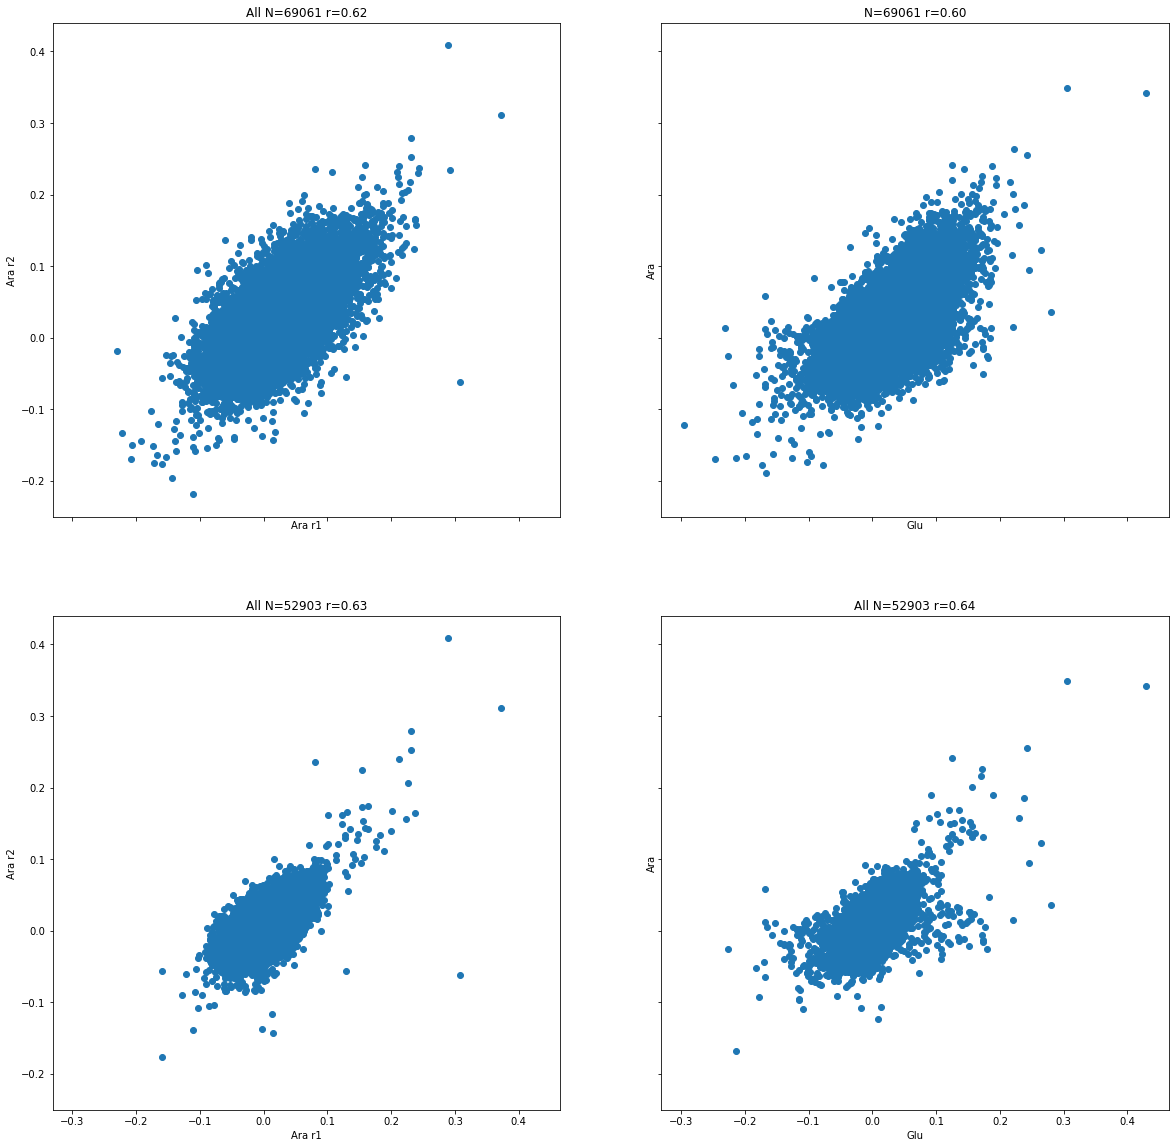

In [37]:
idx = df.TotalReads >= 500

fig,ax = plt.subplots(2,2,figsize=(20,20),sharex='all',sharey='all')

r = spearmanr(df.FitSeq__Fitness_Ara_r1,df.FitSeq__Fitness_Ara_r2)
ax[0,0].scatter(data=df, x='FitSeq__Fitness_Ara_r1',y='FitSeq__Fitness_Ara_r2')
ax[0,0].set_title(f"All N={len(df)} r={r[0]:.2f}")
ax[0,0].set_xlabel('Ara r1')
ax[0,0].set_ylabel('Ara r2')
cor = df['FitSeq__Fitness_Ara_r1'].corr(df['FitSeq__Fitness_Ara_r2'])
print("corrlation of two Ara replicates: ",cor)

r = spearmanr(df.FitSeq__Fitness_Glu,df.FitSeq__Fitness_Arabinose)
ax[0,1].scatter(data=df, x='FitSeq__Fitness_Glu',y='FitSeq__Fitness_Arabinose')
ax[0,1].set_title(f"N={len(df)} r={r[0]:.2f}")
ax[0,1].set_xlabel('Glu')
ax[0,1].set_ylabel('Ara')
cor2 = df['FitSeq__Fitness_Glu'].corr(df['FitSeq__Fitness_Arabinose'])
print("corrlation of glu and ara: ",cor2)

r = spearmanr(df.FitSeq__Fitness_Ara_r1[idx],df.FitSeq__Fitness_Ara_r2[idx])
ax[1,0].scatter(data=df[idx], x='FitSeq__Fitness_Ara_r1',y='FitSeq__Fitness_Ara_r2')
ax[1,0].set_title(f"All N={sum(idx)} r={r[0]:.2f}")
ax[1,0].set_xlabel('Ara r1')
ax[1,0].set_ylabel('Ara r2')
cor3 = df['FitSeq__Fitness_Ara_r1'].corr(df['FitSeq__Fitness_Ara_r2'])
print("corrlation of two Ara replicates(idx = df.TotalReads >= 500): ",cor3)

r = spearmanr(df.FitSeq__Fitness_Glu[idx],df.FitSeq__Fitness_Arabinose[idx])
ax[1,1].scatter(data=df[idx], x='FitSeq__Fitness_Glu',y='FitSeq__Fitness_Arabinose')
ax[1,1].set_title(f"All N={sum(idx)} r={r[0]:.2f}")
ax[1,1].set_xlabel('Glu')
ax[1,1].set_ylabel('Ara')
cor4 = df['FitSeq__Fitness_Glu'].corr(df['FitSeq__Fitness_Arabinose'])
print("corrlation of glu and ara(idx = df.TotalReads >= 500): ",cor4)


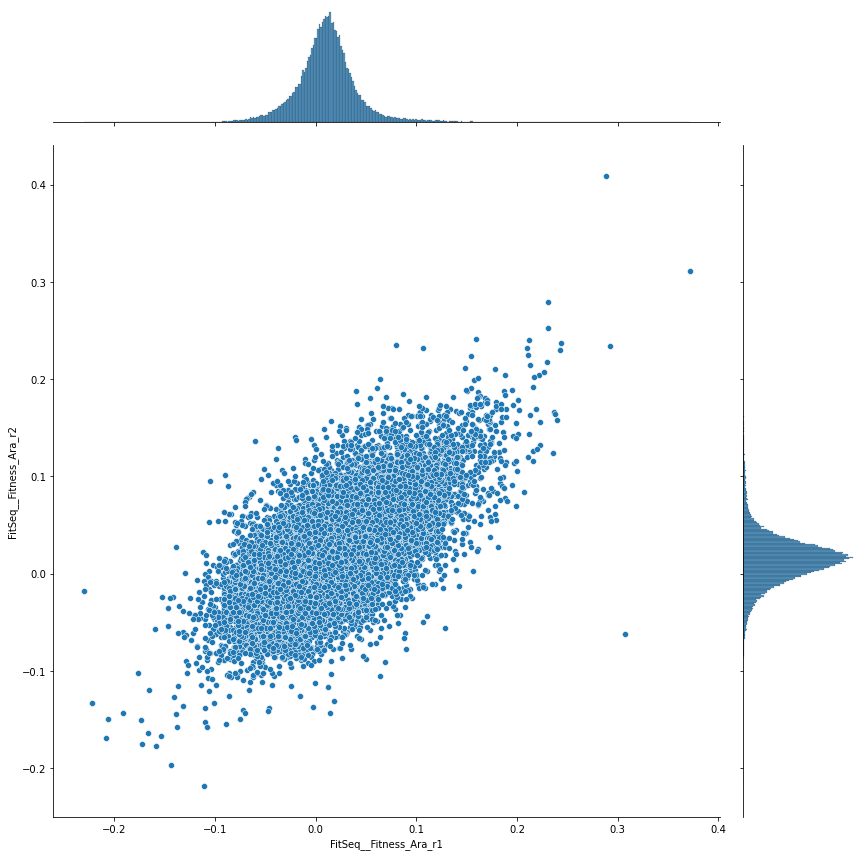

In [38]:
sns.jointplot(data=df, x='FitSeq__Fitness_Ara_r1',y='FitSeq__Fitness_Ara_r2',kind='scatter',height=12)


In [110]:
xl = np.logspace(2,3.5,100)
xl

array([ 100.        ,  103.55033665,  107.2267222 ,  111.03363182,
        114.97569954,  119.05772394,  123.28467394,  127.66169491,
        132.19411485,  136.88745095,  141.74741629,  146.77992676,
        151.9911083 ,  157.38730432,  162.97508346,  168.76124758,
        174.75284   ,  180.95715412,  187.38174229,  194.03442496,
        200.92330026,  208.05675382,  215.443469  ,  223.09243744,
        231.01297001,  239.21470815,  247.7076356 ,  256.50209057,
        265.60877829,  275.03878409,  284.80358684,  294.91507296,
        305.38555088,  316.22776602,  327.45491629,  339.08066819,
        351.11917342,  363.58508612,  376.49358068,  389.86037025,
        403.70172586,  418.03449619,  432.87612811,  448.24468793,
        464.15888336,  480.63808631,  497.70235643,  515.3724656 ,
        533.66992312,  552.61700199,  572.23676594,  592.55309755,
        613.59072734,  635.37526381,  657.93322466,  681.29206906,
        705.48023107,  730.52715427,  756.46332755,  783.32032

In [39]:
xl = np.logspace(2,3.5,200)
xl

array([ 100.        ,  101.75076625,  103.53218433,  105.34479087,
        107.18913192,  109.06576307,  110.97524964,  112.91816686,
        114.89510002,  116.90664466,  118.95340674,  121.03600284,
        123.15506033,  125.31121756,  127.50512407,  129.73744075,
        132.00884008,  134.32000631,  136.67163565,  139.06443652,
        141.49912974,  143.97644875,  146.49713983,  149.06196232,
        151.67168885,  154.32710559,  157.02901247,  159.77822343,
        162.57556664,  165.4218848 ,  168.31803533,  171.26489069,
        174.2633386 ,  177.31428232,  180.41864094,  183.57734962,
        186.7913599 ,  190.06163999,  193.38917505,  196.77496746,
        200.22003718,  203.72542202,  207.29217796,  210.92137946,
        214.61411979,  218.37151137,  222.19468609,  226.08479567,
        230.04301198,  234.0705274 ,  238.1685552 ,  242.33832989,
        246.58110758,  250.8981664 ,  255.29080682,  259.76035212,
        264.3081487 ,  268.93556657,  273.64399971,  278.43486

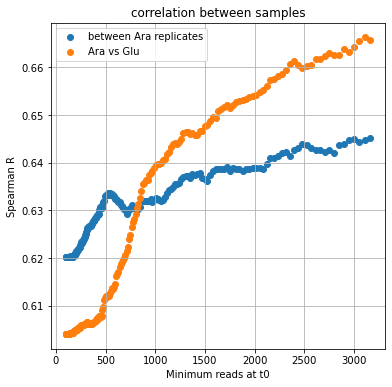

In [115]:
rreps = list()
rAG = list()
xl = np.logspace(2,3.5,200)
for I in xl:
    idx = df.TotalReads >= I
    rreps.append( spearmanr(df.FitSeq__Fitness_Ara_r1[idx],df.FitSeq__Fitness_Ara_r2[idx])[0])
    rAG.append( spearmanr(df.FitSeq__Fitness_Glu[idx],df.FitSeq__Fitness_Arabinose[idx])[0])   
# %%

# %%
fig,ax = plt.subplots(1,1,figsize=(6,6))
ax.scatter(xl,rreps,label='between Ara replicates')
ax.scatter(xl,rAG,label='Ara vs Glu')
ax.set_ylabel('Spearman R')
ax.set_xlabel('Minimum reads at t0')
ax.legend()
#ax.set_xscale('log')
#ax.set_xlim([10,1000])
ax.set_title('correlation between samples')
ax.grid()



In [ ]:
rreps = list()
rAG = list()
xl = np.linspace(-100,1,100)
for I in xl:
    idx = np.logical_and(df.FitSeq__LogLik_Glu >= I,df.FitSeq__LogLik_Ara_r2 >= I)
    idx = np.logical_and(idx,df.FitSeq__LogLik_Ara_r1 >= I)
    rreps.append( spearmanr(df.FitSeq__Fitness_Ara_r1[idx],df.FitSeq__Fitness_Ara_r2[idx])[0])
    rAG.append( spearmanr(df.FitSeq__Fitness_Glu[idx],df.FitSeq__Fitness_Arabinose[idx])[0])   



In [83]:
import regex

In [50]:
fwd = regex.compile('(^' + 'TAACATAGATG' + ')' + '{s<=' + str(2) + '}')

In [51]:
fwd

regex.Regex('(^TAACATAGATG){s<=2}', flags=regex.V0)

In [55]:
df['Seq'] = [re.sub('(^' + 'TAACATAGATG' + ')' + '{s<=' + str(2) + '}','ATG',s) for s in df.Seq]

In [56]:
df

,Seq,Ara_rep1_t3.d4,t0.d4,Glu_t2.d4,Ara_rep1_t1.d4,Ara_rep2_t2.d4,Glu_t1.d4,Ara_rep1_t2.d4,Glu_t3.d4,Ara_rep2_t3.d4,Ara_rep2_t1.d4,TotalReads,FitSeq__Fitness_Ara_r1,FitSeq__LogLik_Ara_r1,FitSeq__Fitness_Ara_r2,FitSeq__LogLik_Ara_r2,FitSeq__Fitness_Glu,FitSeq__LogLik_Glu,FitSeq__Fitness_Arabinose,AA
692,TAAATTAGATGTGTATAAGAGACAGTTCCTGTATCATACGTTTCCA...,175,103,147,216,259,112,137,242,229,171,1791,0.043274,-15.190485,0.038157,-14.263227,0.038471,-14.806348,0.040716,*IRCV*ETVPVSYVSRLPWEQCLIFLHIFLPPCLLYTS
883,TAACAAAGATGTGTATAAGAGACAGACTTCATACTCATATTCCTCA...,50,52,67,47,74,37,43,68,88,40,566,-0.052732,-11.488129,-0.018947,-14.259603,-0.026144,-11.632119,-0.035840,*QRCV*ETDFILIFLKFILLRPFLSDKHNDQNNDRCD*NLSLIHI*
885,TAACAAAGATGTGTATAAGAGACAGAGACGTAAATGAGAATGACAA...,74,39,40,63,45,32,43,63,71,43,513,0.027271,-12.416250,-0.001584,-12.796238,-0.006293,-11.382878,0.012843,*QRCV*ETET*MRMTNFRAPQPLCEALSQQPPHCLLYTS
889,TAACAAAGATGTGTATAAGAGACAGAGCTGTTCTTTGCCGCCGGGA...,165,104,168,217,205,108,177,206,186,138,1674,0.037552,-14.800552,0.016571,-13.671152,0.021197,-12.842947,0.027061,*QRCV*ETELFFAAGKVVVKGAFRCAAFLNNLVQPRAVISCLLYTS
939,TAACAAAGATGTGTATAAGAGACAGCTCATATGGTCTACGTGGGCG...,41,12,23,26,28,32,22,39,19,17,259,0.075993,-9.795151,0.036084,-9.513613,0.150675,-16.834099,0.056038,*QRCV*ETAHMVYVGEKVRNRFEFLGDDLNVTQVIGSFFPVSYTHL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105548,TAACATAGGTGTGTATAAGAGACAGTCAGCCAACCTTGCACGCTTT...,315,225,281,317,390,147,251,311,341,241,2819,0.009667,-14.492992,-0.001728,-18.102240,-0.014426,-16.257148,0.003969,*HRCV*ETVSQPCTL*RHPLRLPYRQRGQPDRPLQANAR*RFRK*S...
106881,TAACATGGATGTGTATAAGAGACAGGGCTTTACAGCCGGAAATGCA...,383,194,333,312,295,205,242,363,281,205,2813,0.037222,-17.247424,-0.005325,-15.460902,0.016829,-14.686916,0.015948,*HGCV*ETGLYSRKCKSLKKNTAQRIKKHSKSFSRKQWLSLIHI*
106913,TAACTTAGATGTGTATAAGAGACAGATTCCTTATCCTGAATGCGGG...,154,105,154,215,225,115,160,219,209,192,1748,0.033435,-14.599035,0.034202,-14.133942,0.027699,-13.672159,0.033819,*LRCV*ETDSLS*MREKIPVNCVVNIFNISESSFITVSYTHL
106993,TAATATAGATGTGTATAAGAGACAGCAATCACAGCAAATACGGCAG...,383,275,346,474,583,249,346,547,564,398,4165,0.023143,-15.129572,0.031156,-15.780119,0.025419,-17.556797,0.027149,*YRCV*ETAITANTAAVLMRVIAKISRYDCR*VLSLIHI*


In [64]:
df['Seq'] = [re.sub('(^' + 'TAACATAGATG' + ')' + '{s<=' + str(3) + '}','ATG',s) for s in df.Seq]
df['Seq'] = [re.sub('(' + 'TAATTAATT' + '$)' + '{s<=' + str(3) + '}','TAA',s) for s in df.Seq]
df['AA'] = [str(Seq(s).translate()) for s in df.Seq]

df.sort_values("Seq")

/opt/anaconda3/lib/python3.8/site-packages/Bio/Seq.py:2334: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


,Seq,Ara_rep1_t3.d4,t0.d4,Glu_t2.d4,Ara_rep1_t1.d4,Ara_rep2_t2.d4,Glu_t1.d4,Ara_rep1_t2.d4,Glu_t3.d4,Ara_rep2_t3.d4,...,TotalReads,FitSeq__Fitness_Ara_r1,FitSeq__LogLik_Ara_r1,FitSeq__Fitness_Ara_r2,FitSeq__LogLik_Ara_r2,FitSeq__Fitness_Glu,FitSeq__LogLik_Glu,FitSeq__Fitness_Arabinose,AA,coding_seq
2940,ATGGGTATAAGAGACAGTGTTTCGACTTGATCAACGTTGGCGAGAT...,260,189,228,249,255,129,190,234,235,...,2137,0.003455,-15.000895,-0.024209,-16.606088,-0.021919,-14.599747,-0.010377,MGIRDSVST*STLARSVSFLASAAAASVSYTHL,ATGGGTATAAGAGACAGTGTTTCGACTTGATCAACGTTGGCGAGAT...
3318,ATGTGATAAGAGACAGTGGCAGCCGCATGATATGACAGAGCAGCAA...,23,25,41,18,30,21,38,32,35,...,282,0.051755,-25.218667,0.009845,-11.459917,-0.042961,-11.066295,0.030800,M**ETVAAA*YDRAANGRSEAYCESHYG*AWRIRSIWR*AAVSYTHL,ATGTGATAAGAGACAGTGGCAGCCGCATGATATGACAGAGCAGCAA...
3320,ATGTGATAAGAGACAGTTTTCAGTGAGAATTTGTTTCGCGCGCTCA...,1155,583,1034,971,928,565,812,1061,1040,...,8981,0.040761,-19.878245,0.021658,-19.473449,0.013319,-22.253218,0.031209,M**ETVFSENLFRALITFFDDALNFLINFVSDLITVVLFVVEITAV...,ATGTGATAAGAGACAGTTTTCAGTGAGAATTTGTTTCGCGCGCTCA...
3635,ATGTGTAAAGAGACAGAACGTAATCCCAATCCCAAGCATAATCGAT...,120,70,105,83,116,59,85,115,113,...,945,0.004718,-13.572831,0.001006,-12.748835,-0.000801,-12.303396,0.002862,MCKETERNPNPKHNRFKAADFIKQKTAA*ISCYTCLLYTS,ATGTGTAAAGAGACAGAACGTAATCCCAATCCCAAGCATAATCGAT...
3636,ATGTGTAAAGAGACAGCGAGCAATCTTTGCTTCTCACATTCCGATT...,85,60,105,85,95,62,66,113,93,...,831,0.005650,-11.934043,-0.003283,-12.260120,0.011186,-12.278256,0.001184,MCKETASNLCFSHSDYIGCRA*DGLYDLSLIHI*,ATGTGTAAAGAGACAGCGAGCAATCTTTGCTTCTCACATTCCGATT...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105548,TAACATAGGTGTGTATAAGAGACAGTCAGCCAACCTTGCACGCTTT...,315,225,281,317,390,147,251,311,341,...,2819,0.009667,-14.492992,-0.001728,-18.102240,-0.014426,-16.257148,0.003969,*HRCV*ETVSQPCTL*RHPLRLPYRQRGQPDRPLQANAR*RFRK*S...,TAACATAGGTGTGTATAAGAGACAGTCAGCCAACCTTGCACGCTTT...
106881,TAACATGGATGTGTATAAGAGACAGGGCTTTACAGCCGGAAATGCA...,383,194,333,312,295,205,242,363,281,...,2813,0.037222,-17.247424,-0.005325,-15.460902,0.016829,-14.686916,0.015948,*HGCV*ETGLYSRKCKSLKKNTAQRIKKHSKSFSRKQWLSLIHI*,TAACATGGATGTGTATAAGAGACAGGGCTTTACAGCCGGAAATGCA...
106913,TAACTTAGATGTGTATAAGAGACAGATTCCTTATCCTGAATGCGGG...,154,105,154,215,225,115,160,219,209,...,1748,0.033435,-14.599035,0.034202,-14.133942,0.027699,-13.672159,0.033819,*LRCV*ETDSLS*MREKIPVNCVVNIFNISESSFITVSYTHL,TAACTTAGATGTGTATAAGAGACAGATTCCTTATCCTGAATGCGGG...
106993,TAATATAGATGTGTATAAGAGACAGCAATCACAGCAAATACGGCAG...,383,275,346,474,583,249,346,547,564,...,4165,0.023143,-15.129572,0.031156,-15.780119,0.025419,-17.556797,0.027149,*YRCV*ETAITANTAAVLMRVIAKISRYDCR*VLSLIHI*,TAATATAGATGTGTATAAGAGACAGCAATCACAGCAAATACGGCAG...


In [120]:
temp = df.head(100)

coding_seq = []
for s in temp['AA']:
    if re.match('^ATG',str(s)):
        #print(str(s))
        coding_seq.append(str(s))
    else:
        coding_seq.append('NULL')
        
coding_seq
temp['coding_seq'] = coding_seq
temp

<ipython-input-120-c93d3c661224>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['coding_seq'] = coding_seq


,Seq,Ara_rep1_t3.d4,t0.d4,Glu_t2.d4,Ara_rep1_t1.d4,Ara_rep2_t2.d4,Glu_t1.d4,Ara_rep1_t2.d4,Glu_t3.d4,Ara_rep2_t3.d4,...,TotalReads,FitSeq__Fitness_Ara_r1,FitSeq__LogLik_Ara_r1,FitSeq__Fitness_Ara_r2,FitSeq__LogLik_Ara_r2,FitSeq__Fitness_Glu,FitSeq__LogLik_Glu,FitSeq__Fitness_Arabinose,coding_seq,AA
692,TAAATTAGATGTGTATAAGAGACAGTTCCTGTATCATACGTTTCCA...,175,103,147,216,259,112,137,242,229,...,1791,0.043274,-15.190485,0.038157,-14.263227,0.038471,-14.806348,0.040716,NULL,TAAATTAGATGTGTATAAGAGACAGTTCCTGTATCATACGTTTCCA...
883,TAACAAAGATGTGTATAAGAGACAGACTTCATACTCATATTCCTCA...,50,52,67,47,74,37,43,68,88,...,566,-0.052732,-11.488129,-0.018947,-14.259603,-0.026144,-11.632119,-0.035840,ATGTGTATAAGAGACAGACTTCATACTCATATTCCTCAAATTCATC...,ATGTGTATAAGAGACAGACTTCATACTCATATTCCTCAAATTCATC...
885,TAACAAAGATGTGTATAAGAGACAGAGACGTAAATGAGAATGACAA...,74,39,40,63,45,32,43,63,71,...,513,0.027271,-12.416250,-0.001584,-12.796238,-0.006293,-11.382878,0.012843,ATGTGTATAAGAGACAGAGACGTAAATGAGAATGACAAACTTCCGT...,ATGTGTATAAGAGACAGAGACGTAAATGAGAATGACAAACTTCCGT...
889,TAACAAAGATGTGTATAAGAGACAGAGCTGTTCTTTGCCGCCGGGA...,165,104,168,217,205,108,177,206,186,...,1674,0.037552,-14.800552,0.016571,-13.671152,0.021197,-12.842947,0.027061,ATGTGTATAAGAGACAGAGCTGTTCTTTGCCGCCGGGAAAGTGGTA...,ATGTGTATAAGAGACAGAGCTGTTCTTTGCCGCCGGGAAAGTGGTA...
939,TAACAAAGATGTGTATAAGAGACAGCTCATATGGTCTACGTGGGCG...,41,12,23,26,28,32,22,39,19,...,259,0.075993,-9.795151,0.036084,-9.513613,0.150675,-16.834099,0.056038,ATGTGTATAAGAGACAGCTCATATGGTCTACGTGGGCGAGAAAGTC...,ATGTGTATAAGAGACAGCTCATATGGTCTACGTGGGCGAGAAAGTC...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1380,TAACACAGATGTGTATAAGAGACAGGCACCATACCAATTTTATTGC...,88,52,73,73,84,47,67,85,74,...,701,0.014045,-11.996391,-0.010091,-11.971790,-0.000902,-11.477529,0.001977,NULL,TAACACAGATGTGTATAAGAGACAGGCACCATACCAATTTTATTGC...
1382,TAACACAGATGTGTATAAGAGACAGGCATAAAAATTGCATTCTGAG...,393,244,316,356,417,199,291,374,416,...,3271,0.019760,-15.540714,0.007009,-18.159861,0.000725,-14.033885,0.013384,NULL,TAACACAGATGTGTATAAGAGACAGGCATAAAAATTGCATTCTGAG...
1385,TAACACAGATGTGTATAAGAGACAGGCCCTTTGTTCTGTCCATTGT...,89,69,105,120,109,46,79,110,119,...,945,0.015822,-12.594560,0.014750,-12.609093,-0.012169,-13.805904,0.015286,NULL,TAACACAGATGTGTATAAGAGACAGGCCCTTTGTTCTGTCCATTGT...
1386,TAACACAGATGTGTATAAGAGACAGGCCGAAGATTGAAAAGTGGGA...,200,126,193,184,238,111,189,254,254,...,1939,0.016074,-14.128347,0.030135,-13.552406,0.021841,-13.375183,0.023105,NULL,TAACACAGATGTGTATAAGAGACAGGCCGAAGATTGAAAAGTGGGA...


In [121]:
nt = [re.sub('^TAACA[T,A]AGATGTGT','ATGTGT',s) for s in df.Seq]
nt = [re.sub('TAATTAATT$','TAA',s) for s in nt]
df['AA'] = nt
coding_seq = []
for s in df['AA']:
    if re.match('^ATG',str(s)):
        #print(str(s))
        coding_seq.append(str(s))
    else:
        coding_seq.append('NULL')
df['coding_seq'] = coding_seq

In [128]:
df

,Seq,Ara_rep1_t3.d4,t0.d4,Glu_t2.d4,Ara_rep1_t1.d4,Ara_rep2_t2.d4,Glu_t1.d4,Ara_rep1_t2.d4,Glu_t3.d4,Ara_rep2_t3.d4,...,TotalReads,FitSeq__Fitness_Ara_r1,FitSeq__LogLik_Ara_r1,FitSeq__Fitness_Ara_r2,FitSeq__LogLik_Ara_r2,FitSeq__Fitness_Glu,FitSeq__LogLik_Glu,FitSeq__Fitness_Arabinose,coding_seq,AA
692,TAAATTAGATGTGTATAAGAGACAGTTCCTGTATCATACGTTTCCA...,175,103,147,216,259,112,137,242,229,...,1791,0.043274,-15.190485,0.038157,-14.263227,0.038471,-14.806348,0.040716,NULL,TAAATTAGATGTGTATAAGAGACAGTTCCTGTATCATACGTTTCCA...
883,TAACAAAGATGTGTATAAGAGACAGACTTCATACTCATATTCCTCA...,50,52,67,47,74,37,43,68,88,...,566,-0.052732,-11.488129,-0.018947,-14.259603,-0.026144,-11.632119,-0.035840,ATGTGTATAAGAGACAGACTTCATACTCATATTCCTCAAATTCATC...,ATGTGTATAAGAGACAGACTTCATACTCATATTCCTCAAATTCATC...
885,TAACAAAGATGTGTATAAGAGACAGAGACGTAAATGAGAATGACAA...,74,39,40,63,45,32,43,63,71,...,513,0.027271,-12.416250,-0.001584,-12.796238,-0.006293,-11.382878,0.012843,ATGTGTATAAGAGACAGAGACGTAAATGAGAATGACAAACTTCCGT...,ATGTGTATAAGAGACAGAGACGTAAATGAGAATGACAAACTTCCGT...
889,TAACAAAGATGTGTATAAGAGACAGAGCTGTTCTTTGCCGCCGGGA...,165,104,168,217,205,108,177,206,186,...,1674,0.037552,-14.800552,0.016571,-13.671152,0.021197,-12.842947,0.027061,ATGTGTATAAGAGACAGAGCTGTTCTTTGCCGCCGGGAAAGTGGTA...,ATGTGTATAAGAGACAGAGCTGTTCTTTGCCGCCGGGAAAGTGGTA...
939,TAACAAAGATGTGTATAAGAGACAGCTCATATGGTCTACGTGGGCG...,41,12,23,26,28,32,22,39,19,...,259,0.075993,-9.795151,0.036084,-9.513613,0.150675,-16.834099,0.056038,ATGTGTATAAGAGACAGCTCATATGGTCTACGTGGGCGAGAAAGTC...,ATGTGTATAAGAGACAGCTCATATGGTCTACGTGGGCGAGAAAGTC...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105548,TAACATAGGTGTGTATAAGAGACAGTCAGCCAACCTTGCACGCTTT...,315,225,281,317,390,147,251,311,341,...,2819,0.009667,-14.492992,-0.001728,-18.102240,-0.014426,-16.257148,0.003969,NULL,TAACATAGGTGTGTATAAGAGACAGTCAGCCAACCTTGCACGCTTT...
106881,TAACATGGATGTGTATAAGAGACAGGGCTTTACAGCCGGAAATGCA...,383,194,333,312,295,205,242,363,281,...,2813,0.037222,-17.247424,-0.005325,-15.460902,0.016829,-14.686916,0.015948,NULL,TAACATGGATGTGTATAAGAGACAGGGCTTTACAGCCGGAAATGCA...
106913,TAACTTAGATGTGTATAAGAGACAGATTCCTTATCCTGAATGCGGG...,154,105,154,215,225,115,160,219,209,...,1748,0.033435,-14.599035,0.034202,-14.133942,0.027699,-13.672159,0.033819,NULL,TAACTTAGATGTGTATAAGAGACAGATTCCTTATCCTGAATGCGGG...
106993,TAATATAGATGTGTATAAGAGACAGCAATCACAGCAAATACGGCAG...,383,275,346,474,583,249,346,547,564,...,4165,0.023143,-15.129572,0.031156,-15.780119,0.025419,-17.556797,0.027149,NULL,TAATATAGATGTGTATAAGAGACAGCAATCACAGCAAATACGGCAG...


In [132]:
AA = []
count = 0 
for s in df['coding_seq']:
    if s != 'NULL':
        amino = str(Seq(s).translate())
        AA.append(amino)
        count += 1
    else:
        AA.append('NULL')
                    
df['AA'] = AA
print("the number of coding sequence is :", count)

/opt/anaconda3/lib/python3.8/site-packages/Bio/Seq.py:2334: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


the number of coding sequence is : 68800


In [134]:
df

,Seq,Ara_rep1_t3.d4,t0.d4,Glu_t2.d4,Ara_rep1_t1.d4,Ara_rep2_t2.d4,Glu_t1.d4,Ara_rep1_t2.d4,Glu_t3.d4,Ara_rep2_t3.d4,...,TotalReads,FitSeq__Fitness_Ara_r1,FitSeq__LogLik_Ara_r1,FitSeq__Fitness_Ara_r2,FitSeq__LogLik_Ara_r2,FitSeq__Fitness_Glu,FitSeq__LogLik_Glu,FitSeq__Fitness_Arabinose,coding_seq,AA
692,TAAATTAGATGTGTATAAGAGACAGTTCCTGTATCATACGTTTCCA...,175,103,147,216,259,112,137,242,229,...,1791,0.043274,-15.190485,0.038157,-14.263227,0.038471,-14.806348,0.040716,NULL,NULL
883,TAACAAAGATGTGTATAAGAGACAGACTTCATACTCATATTCCTCA...,50,52,67,47,74,37,43,68,88,...,566,-0.052732,-11.488129,-0.018947,-14.259603,-0.026144,-11.632119,-0.035840,ATGTGTATAAGAGACAGACTTCATACTCATATTCCTCAAATTCATC...,MCIRDRLHTHIPQIHPLAPVSF*QA**SEQ*SLRLKPVSYTHL
885,TAACAAAGATGTGTATAAGAGACAGAGACGTAAATGAGAATGACAA...,74,39,40,63,45,32,43,63,71,...,513,0.027271,-12.416250,-0.001584,-12.796238,-0.006293,-11.382878,0.012843,ATGTGTATAAGAGACAGAGACGTAAATGAGAATGACAAACTTCCGT...,MCIRDRDVNENDKLPCTSAAV*STFSAAATLSLIHI*
889,TAACAAAGATGTGTATAAGAGACAGAGCTGTTCTTTGCCGCCGGGA...,165,104,168,217,205,108,177,206,186,...,1674,0.037552,-14.800552,0.016571,-13.671152,0.021197,-12.842947,0.027061,ATGTGTATAAGAGACAGAGCTGTTCTTTGCCGCCGGGAAAGTGGTA...,MCIRDRAVLCRRESGSKGSL*VRRFP**SGSAPCRNILSLIHI*
939,TAACAAAGATGTGTATAAGAGACAGCTCATATGGTCTACGTGGGCG...,41,12,23,26,28,32,22,39,19,...,259,0.075993,-9.795151,0.036084,-9.513613,0.150675,-16.834099,0.056038,ATGTGTATAAGAGACAGCTCATATGGTCTACGTGGGCGAGAAAGTC...,MCIRDSSYGLRGRESQESF*ISWRRP*CHAGHRILFPCLLYTS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105548,TAACATAGGTGTGTATAAGAGACAGTCAGCCAACCTTGCACGCTTT...,315,225,281,317,390,147,251,311,341,...,2819,0.009667,-14.492992,-0.001728,-18.102240,-0.014426,-16.257148,0.003969,NULL,NULL
106881,TAACATGGATGTGTATAAGAGACAGGGCTTTACAGCCGGAAATGCA...,383,194,333,312,295,205,242,363,281,...,2813,0.037222,-17.247424,-0.005325,-15.460902,0.016829,-14.686916,0.015948,NULL,NULL
106913,TAACTTAGATGTGTATAAGAGACAGATTCCTTATCCTGAATGCGGG...,154,105,154,215,225,115,160,219,209,...,1748,0.033435,-14.599035,0.034202,-14.133942,0.027699,-13.672159,0.033819,NULL,NULL
106993,TAATATAGATGTGTATAAGAGACAGCAATCACAGCAAATACGGCAG...,383,275,346,474,583,249,346,547,564,...,4165,0.023143,-15.129572,0.031156,-15.780119,0.025419,-17.556797,0.027149,NULL,NULL


In [135]:
coding_sequence = df.loc[df['coding_seq'] != 'NULL']

In [137]:
coding_sequence.to_csv('filter_translated_coding_seq.tab',sep='\t',index=False)

In [136]:
coding_sequence

,Seq,Ara_rep1_t3.d4,t0.d4,Glu_t2.d4,Ara_rep1_t1.d4,Ara_rep2_t2.d4,Glu_t1.d4,Ara_rep1_t2.d4,Glu_t3.d4,Ara_rep2_t3.d4,...,TotalReads,FitSeq__Fitness_Ara_r1,FitSeq__LogLik_Ara_r1,FitSeq__Fitness_Ara_r2,FitSeq__LogLik_Ara_r2,FitSeq__Fitness_Glu,FitSeq__LogLik_Glu,FitSeq__Fitness_Arabinose,coding_seq,AA
883,TAACAAAGATGTGTATAAGAGACAGACTTCATACTCATATTCCTCA...,50,52,67,47,74,37,43,68,88,...,566,-0.052732,-11.488129,-0.018947,-14.259603,-0.026144,-11.632119,-0.035840,ATGTGTATAAGAGACAGACTTCATACTCATATTCCTCAAATTCATC...,MCIRDRLHTHIPQIHPLAPVSF*QA**SEQ*SLRLKPVSYTHL
885,TAACAAAGATGTGTATAAGAGACAGAGACGTAAATGAGAATGACAA...,74,39,40,63,45,32,43,63,71,...,513,0.027271,-12.416250,-0.001584,-12.796238,-0.006293,-11.382878,0.012843,ATGTGTATAAGAGACAGAGACGTAAATGAGAATGACAAACTTCCGT...,MCIRDRDVNENDKLPCTSAAV*STFSAAATLSLIHI*
889,TAACAAAGATGTGTATAAGAGACAGAGCTGTTCTTTGCCGCCGGGA...,165,104,168,217,205,108,177,206,186,...,1674,0.037552,-14.800552,0.016571,-13.671152,0.021197,-12.842947,0.027061,ATGTGTATAAGAGACAGAGCTGTTCTTTGCCGCCGGGAAAGTGGTA...,MCIRDRAVLCRRESGSKGSL*VRRFP**SGSAPCRNILSLIHI*
939,TAACAAAGATGTGTATAAGAGACAGCTCATATGGTCTACGTGGGCG...,41,12,23,26,28,32,22,39,19,...,259,0.075993,-9.795151,0.036084,-9.513613,0.150675,-16.834099,0.056038,ATGTGTATAAGAGACAGCTCATATGGTCTACGTGGGCGAGAAAGTC...,MCIRDSSYGLRGRESQESF*ISWRRP*CHAGHRILFPCLLYTS
946,TAACAAAGATGTGTATAAGAGACAGCTGTTAGCTGCTTGTTGTCTT...,109,91,128,115,118,72,88,110,104,...,1032,-0.009330,-12.482253,-0.022630,-12.324749,-0.026275,-13.588917,-0.015980,ATGTGTATAAGAGACAGCTGTTAGCTGCTTGTTGTCTTTCGCCGTT...,MCIRDSC*LLVVFRRF*KNMQHSRHKINVAHFVFFNIIHALLR*FC...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104172,TAACATAGATGTGTATAATAGACAGATTGTGGCCGGATCATTTTTT...,348,271,374,358,369,186,246,437,288,...,3158,0.000320,-16.956785,-0.024272,-15.324332,-0.001035,-18.084165,-0.011976,ATGTGTATAATAGACAGATTGTGGCCGGATCATTTTTTTTGCATAT...,MCIIDRLWPDHFFCISNHLRHWYGARFSGQHLRLRSSCLLYTS
104201,TAACATAGATGTGTATAATAGACAGCCACATCCTTTTCCACTTAAC...,119,67,119,99,98,57,92,105,86,...,919,0.021918,-12.482379,-0.013331,-11.990170,-0.011014,-14.070865,0.004294,ATGTGTATAATAGACAGCCACATCCTTTTCCACTTAACGTATACTT...,MCIIDSHILFHLTYTLGP*LAVWAVSLLSLIHI*
104636,TAACATAGATGTGTATAGAGACAGGACCTAAGCCGAGGCCGAAAGG...,83,53,81,76,78,48,45,85,90,...,701,0.008584,-13.632360,0.003453,-12.139331,-0.004105,-11.775580,0.006018,ATGTGTATAGAGACAGGACCTAAGCCGAGGCCGAAAGGCGTAGGCG...,MCIETGPKPRPKGVGDGQQVDIPVPPPHHLSNGGTQEDSCLLYTS
104637,TAACATAGATGTGTATAGAGACAGGCTGAAAGCAAGACTGCTGCTT...,380,251,363,318,376,148,317,350,440,...,3296,0.006206,-16.668110,0.018617,-16.913761,-0.021918,-24.335543,0.012412,ATGTGTATAGAGACAGGCTGAAAGCAAGACTGCTGCTTCAAGTACA...,MCIETG*KQDCCFKYTMN*FLKRRRKKLKFLKSLFLSLIHI*


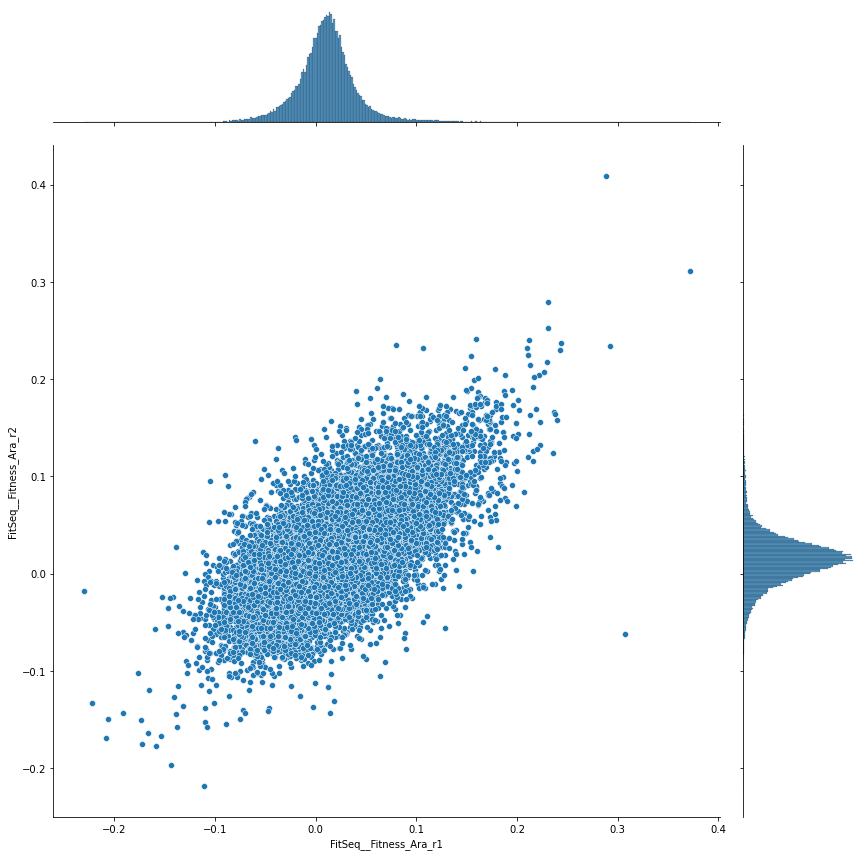

In [138]:
sns.jointplot(data=coding_sequence, x='FitSeq__Fitness_Ara_r1',y='FitSeq__Fitness_Ara_r2',kind='scatter',height=12)

corrlation of two Ara replicates:  0.6695791359634828
corrlation of glu and ara:  0.640699334516768
corrlation of two Ara replicates(idx = df.TotalReads >= 500):  0.6695791359634828
corrlation of glu and ara(idx = df.TotalReads >= 500):  0.640699334516768


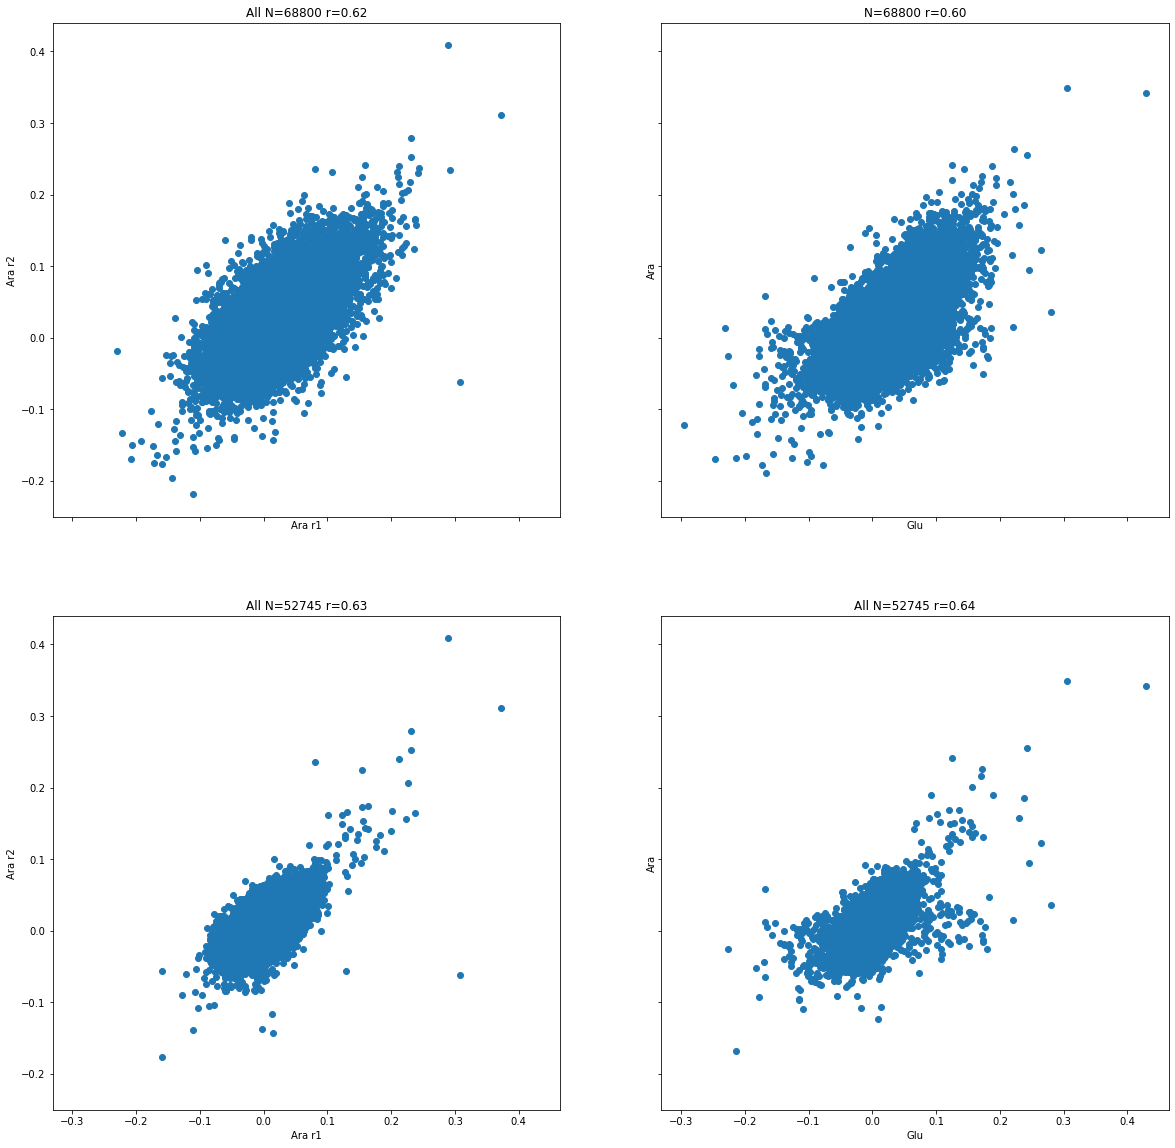

In [141]:
idx = coding_sequence.TotalReads >= 500

fig,ax = plt.subplots(2,2,figsize=(20,20),sharex='all',sharey='all')

r = spearmanr(coding_sequence.FitSeq__Fitness_Ara_r1,coding_sequence.FitSeq__Fitness_Ara_r2)
ax[0,0].scatter(data=coding_sequence, x='FitSeq__Fitness_Ara_r1',y='FitSeq__Fitness_Ara_r2')
ax[0,0].set_title(f"All N={len(coding_sequence)} r={r[0]:.2f}")
ax[0,0].set_xlabel('Ara r1')
ax[0,0].set_ylabel('Ara r2')
cor = coding_sequence['FitSeq__Fitness_Ara_r1'].corr(coding_sequence['FitSeq__Fitness_Ara_r2'])
print("corrlation of two Ara replicates: ",cor)

r = spearmanr(coding_sequence.FitSeq__Fitness_Glu,coding_sequence.FitSeq__Fitness_Arabinose)
ax[0,1].scatter(data=df, x='FitSeq__Fitness_Glu',y='FitSeq__Fitness_Arabinose')
ax[0,1].set_title(f"N={len(coding_sequence)} r={r[0]:.2f}")
ax[0,1].set_xlabel('Glu')
ax[0,1].set_ylabel('Ara')
cor2 = coding_sequence['FitSeq__Fitness_Glu'].corr(coding_sequence['FitSeq__Fitness_Arabinose'])
print("corrlation of glu and ara: ",cor2)

r = spearmanr(coding_sequence.FitSeq__Fitness_Ara_r1[idx],coding_sequence.FitSeq__Fitness_Ara_r2[idx])
ax[1,0].scatter(data=coding_sequence[idx], x='FitSeq__Fitness_Ara_r1',y='FitSeq__Fitness_Ara_r2')
ax[1,0].set_title(f"All N={sum(idx)} r={r[0]:.2f}")
ax[1,0].set_xlabel('Ara r1')
ax[1,0].set_ylabel('Ara r2')
cor3 = coding_sequence['FitSeq__Fitness_Ara_r1'].corr(coding_sequence['FitSeq__Fitness_Ara_r2'])
print("corrlation of two Ara replicates(idx = df.TotalReads >= 500): ",cor3)

r = spearmanr(coding_sequence.FitSeq__Fitness_Glu[idx],coding_sequence.FitSeq__Fitness_Arabinose[idx])
ax[1,1].scatter(data=coding_sequence[idx], x='FitSeq__Fitness_Glu',y='FitSeq__Fitness_Arabinose')
ax[1,1].set_title(f"All N={sum(idx)} r={r[0]:.2f}")
ax[1,1].set_xlabel('Glu')
ax[1,1].set_ylabel('Ara')
cor4 = coding_sequence['FitSeq__Fitness_Glu'].corr(coding_sequence['FitSeq__Fitness_Arabinose'])
print("corrlation of glu and ara(idx = df.TotalReads >= 500): ",cor4)


In [142]:
coding_sequence.sort_values('TotalReads',inplace=True)

<ipython-input-142-8d2ced1f8804>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coding_sequence.sort_values('TotalReads',inplace=True)


In [140]:
coding_sequence

,Seq,Ara_rep1_t3.d4,t0.d4,Glu_t2.d4,Ara_rep1_t1.d4,Ara_rep2_t2.d4,Glu_t1.d4,Ara_rep1_t2.d4,Glu_t3.d4,Ara_rep2_t3.d4,...,TotalReads,FitSeq__Fitness_Ara_r1,FitSeq__LogLik_Ara_r1,FitSeq__Fitness_Ara_r2,FitSeq__LogLik_Ara_r2,FitSeq__Fitness_Glu,FitSeq__LogLik_Glu,FitSeq__Fitness_Arabinose,coding_seq,AA
13978,TAACATAGATGTGTATAAGAGACAGACTTTCTATTAAGTGCTGCGC...,12,8,12,6,23,11,6,6,8,...,100,-0.020217,-9.397510,0.033337,-15.874325,-0.024099,-10.594364,0.006560,ATGTGTATAAGAGACAGACTTTCTATTAAGTGCTGCGCTCGCTCCT...,MCIRDRLSIKCCARSSFFKVFTGEKCRDRYDGHR*IVWCCCLLYTS
39314,TAACATAGATGTGTATAAGAGACAGCCTCTATAAAGAGGGATTTTT...,7,9,17,15,15,6,5,13,6,...,100,0.000348,-8.769920,-0.053479,-11.174385,-0.011381,-10.903028,-0.026566,ATGTGTATAAGAGACAGCCTCTATAAAGAGGGATTTTTTATTCATA...,MCIRDSLYKEGFFIHKNGAGRRLRFYQRKTALRLLCLLYTS
94715,TAACATAGATGTGTATAAGAGACAGTCTCTATATAGCTCATCTTTT...,14,5,13,8,9,7,7,13,10,...,100,0.064811,-7.644716,0.056181,-11.164276,0.042056,-7.165289,0.060496,ATGTGTATAAGAGACAGTCTCTATATAGCTCATCTTTTGTTCCATT...,MCIRDSLYIAHLLFHWQ*FFLHS***CDLK*PRLLPYSVLLSLIHI*
59784,TAACATAGATGTGTATAAGAGACAGGATCAGCTCTTGCAGGACAAC...,13,9,9,12,9,5,8,15,10,...,100,0.010769,-7.489915,-0.018529,-6.733329,0.007113,-7.612871,-0.003880,ATGTGTATAAGAGACAGGATCAGCTCTTGCAGGACAACTTTGCTGT...,MCIRDRISSCRTTLLSPTTGICVFMIFPISAGSISTVSYTHL
20906,TAACATAGATGTGTATAAGAGACAGATCCAAGGTCAGCCAAAGCTG...,12,8,7,15,10,5,13,9,14,...,100,0.032579,-7.074896,0.004190,-8.125758,-0.024823,-5.887182,0.018384,ATGTGTATAAGAGACAGATCCAAGGTCAGCCAAAGCTGCTCCAATT...,MCIRDRSKVSQSCSNFICFFHQLFI*PRFLLTRLILP*TVSYTHL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73257,TAACATAGATGTGTATAAGAGACAGGGATGATTCAGGATGCAAGAG...,4873,3556,5582,5301,6445,3382,4735,6780,6152,...,51823,0.013345,-27.655838,0.020448,-21.929454,0.021292,-22.735986,0.016896,ATGTGTATAAGAGACAGGGATGATTCAGGATGCAAGAGACCGCGGA...,MCIRDRDDSGCKRPRNAN*RYIRTKNPCSCRHG*LSLIHI*
24800,TAACATAGATGTGTATAAGAGACAGATGTTGATCCGTGGGCTGCAT...,5076,3613,5416,5497,6464,3601,4767,6569,6421,...,52392,0.016202,-23.407572,0.021246,-23.959629,0.018714,-21.957836,0.018724,ATGTGTATAAGAGACAGATGTTGATCCGTGGGCTGCATTCTTCAAC...,MCIRDRC*SVGCILQPKLFYHRRPCRFILSLIHI*
70530,TAACATAGATGTGTATAAGAGACAGGCTTCAGGTCATCAAGTCCAT...,4959,3807,5751,6190,6988,3714,4892,7202,6813,...,55787,0.016961,-26.114137,0.023297,-21.960161,0.021773,-20.918980,0.020129,ATGTGTATAAGAGACAGGCTTCAGGTCATCAAGTCCATTGCGGAAA...,MCIRDRLQVIKSIAEKQTTMIIVTHEMAFAKEVADKAVSYTHL
82386,TAACATAGATGTGTATAAGAGACAGGTCTCACTCGGAACAGCGGAT...,5849,4021,6093,6028,6719,3522,5021,7121,6675,...,56182,0.017405,-23.172914,0.013939,-29.403064,0.013867,-32.085040,0.015672,ATGTGTATAAGAGACAGGTCTCACTCGGAACAGCGGATAAGCATCC...,MCIRDRSHSEQRISIRG*LRCTNEKAMSAQVNKTLAKGICCLLYTS


In [171]:
syn_var = coding_sequence.groupby('AA')['TotalReads'].count()
syn_var = syn_var.index.values[syn_var==2]
len(syn_var)

19

In [170]:
syn_var = coding_sequence.groupby('AA')['TotalReads'].count()
syn_var = syn_var.index.values[syn_var==2]
syn_var

array(['MCIRDR*RIFFNFFL*FGIFCLKFLFPMGICCLLYTS',
       'MCIRDRAVLCRRESGSKGSL*VRRFP**SGSAPCRNILSLIHI*',
       'MCIRDRDVNENDKLPCTSAAV*STFSAAATLSLIHI*',
       'MCIRDREMIATMVYKLTKDATPEQLREAGLGDHYANHDGCLLYTS',
       'MCIRDRFSPIKNYVTMLC*RIKRVTKTYTCLFQKKMVIYS*SVSYTHL',
       'MCIRDRFVTIETLEINISFSPLRIPIKLAIINE*L*GCLLYTS',
       'MCIRDRL*PAELQAHLNLFKEQSSFKTKQDRERSVYKTQGLIFLSLIHI*',
       'MCIRDRNGCIR*LRL*SCHKVPTLSPVLQSGPLLQRLSLIHI*',
       'MCIRDRNSSWSLRTHHYVSS*LEETS*SVRSNSRTPVSYTHL',
       'MCIRDRPCSM*TGRMEKSIGLPRLRLSCPSCWKFRLSTVSYTHL',
       'MCIRDRRERACGEKTEKQSD*YNKLARHVFHDLSPFSMLSLIHI*',
       'MCIRDRS*SWKKCTVYLFCFSVTAV*GNHCLSLIHI*',
       'MCIRDRS*THLISCQHCLRTACYIVTKVLCIHCLLYTS',
       'MCIRDRSAAL*RPLSSISASALFW*SMLQIVISVSYTHL',
       'MCIRDSATTASQNEILEFDMASTTSCT*TSCSTCLLYTS',
       'MCIRDSPKSSSAPSPDKATVTCFFASFATCLLYTS',
       'MCIRDSPYSKKNVSPTPQGLKTIWPYSN*LSLSFTYLSLIHI*',
       'MCIRDSS*RMLQMC*SGLFFLFHWKRK*ISMALSLLSLIHI*',
       'MCIRDSSYGLRGRESQESF*ISWRRP*CHAGHRILFPCLLYTS

In [181]:
distances = list()

In [150]:
def hamming_distance(string1, string2):
    return sum(c1 != c2 for c1, c2 in zip(string1, string2))

def hamming_distance1(array1):
    return sum(c1 != c2 for c1, c2 in zip(array1[0], array1[1]))

In [153]:
hamming_distance1('jglwrh')

1

In [179]:
for sv in syn_var:
    a = coding_sequence[coding_sequence.AA==sv]['coding_seq'].values
    b = hamming_distance1(a)
    print(a, b)      


['ATGTGTATAAGAGACAGGTGAAGGATTTTCTTTAATTTCTTTCTTTAATTCGGCATTTTCTGCTTGAAGTTCTTGTTTCCAATGGGGATTTGCTGTCTCTTATACACATCTAA'
 'ATGTGTATAAGAGACAGGTGAAGGATTTTCTTTAATTTCTTTCTTTAATTCGGCATTTTCTGCTTGAAGTTCTTGTTTCCAATGGGGATTTGCTGTCTCTTATACACATCTAA'] 0
['ATGTGTATAAGAGACAGAGCTGTTCTTTGCCGCCGGGAAAGTGGTAGTAAAGGGAGCCTTTAGGTGCGCCGCTTTCCTTAATAATCTGGTTCAGCCCCGTGCCGTAATATCCTGTCTCTTATACACATCTAA'
 'ATGTGTATAAGAGACAGAGCTGTTCTTTGCCGCCGGGAAAGTGGTAGTAAAGGGAGCCTTTAGGTGCGCCGCTTTCCTTAATAATCTGGTTCAGCCCCGTGCCGTAATATCCTGTCTCTTATACACATCTAA'] 0
['ATGTGTATAAGAGACAGAGACGTAAATGAGAATGACAAACTTCCGTGCACCTCAGCCGCTGTGTGAAGCACTTTCTCAGCAGCCGCCACACTGTCTCTTATACACATCTAA'
 'ATGTGTATAAGAGACAGAGACGTAAATGAGAATGACAAACTTCCGTGCACCTCAGCCGCTGTGTGAAGCACTTTCTCAGCAGCCGCCACACTGTCTCTTATACACATCTAA'] 0
['ATGTGTATAAGAGACAGGGAAATGATTGCGACCATGGTCTACAAGTTAACGAAAGACGCTACACCGGAGCAGCTTCGTGAAGCCGGGCTTGGAGATCATTATGCCAATCACGATGGCTGTCTCTTATACACATCTAA'
 'ATGTGTATAAGAGACAGGGAAATGATTGCGACCATGGTCTACAAGTTAACGAAAGACGCTACACCGGAGCAGCTTCGTGAAGCCGGGCTTGGAGATCATTACGCCAATCACG

In [182]:
for sv in syn_var:
    distances.append(hamming_distance1(coding_sequence[coding_sequence.AA==sv]['coding_seq'].values))
print(distances)

[0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 2, 0, 1, 1, 1, 0, 0]


In [161]:
coding_sequence['coding_seq'].sample(2)

45041    ATGTGTATAAGAGACAGCGTTGCTCCCGTTGCTCCCGTTGCTCCCG...
87457    ATGTGTATAAGAGACAGGTTTATGAGTGTATATGACTCATTCATTA...
Name: coding_seq, dtype: object

In [188]:
temp = coding_sequence['coding_seq'].sample(2).values
temp


array(['ATGTGTATAAGAGACAGCGCGAAGATATGCGAAGCGAGCTGGATCTTCACGGTAAAAAAATTGTCCTTTTTGTCGGCCGGCTCAGCAAAGTAAAAGGCCCGCACATTTTATTGCAGGCGCTGCCGGACATCTGTCTCTTATACACATCTAA',
       'ATGTGTATAAGAGACAGATCCTTATGCTTCTTCACATACTCAGCGGCAGCTTTGGCAGGTTTTTCGCCTTCTTCCACCTCTGTCTCTTATACACATCTAA'],
      dtype=object)

In [189]:
for sv in syn_var:
    distances.append( hamming_distance1(coding_sequence['coding_seq'].sample(2).values))

print(distances)

[0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 2, 0, 1, 1, 1, 0, 0, 85, 87, 80, 88, 65, 83, 54, 74, 80, 69, 57, 82, 100, 64, 78, 88, 72, 95, 87]
